## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Loading the dataset

In [2]:
# Loading the data
df = pd.read_csv('Dataset/Churn Modelling Dataset/CustomerChurn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Descriptive Statistics of numerical values

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Observations:

Senior Citizen, is actually categorical (i.e., it only contains two values 0 and 1, signifying whether a particular customer is a senior citizen or not) so its 25%, 50%, 75% and mean are not proper.

Over 75% of the customers have tenure less than 55 months

Average MonthlyCharges are USD$64.76$, but 25% of the customers are paying more than $89.85 monthly charge

In [7]:
df['Churn'].value_counts()/len(df) * 100

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

Around 26% of the customers have churned

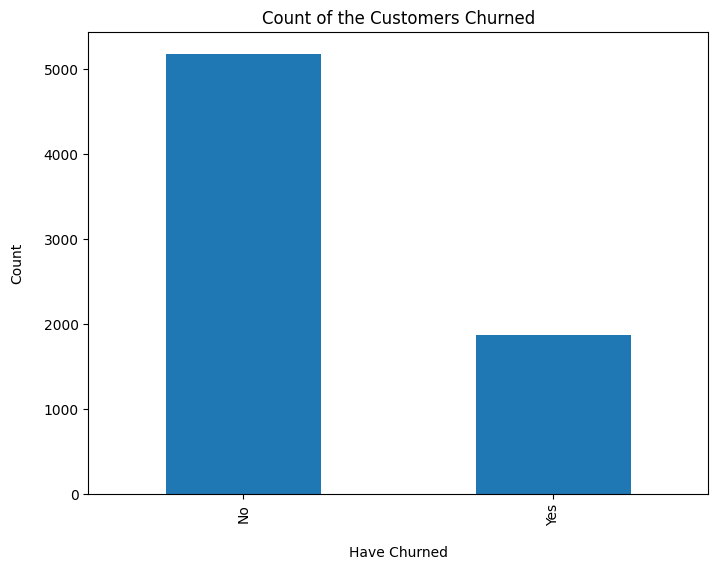

In [8]:
# Let's see it visually
df['Churn'].value_counts().plot(kind='bar', figsize=(8,6))
plt.xlabel("Have Churned", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title("Count of the Customers Churned");
plt.show()

* Data is highly imbalanced, ratio = 3:1
* So we analyze the data with other features while taking the target values sepearately to get some insights

In [9]:
# concise summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


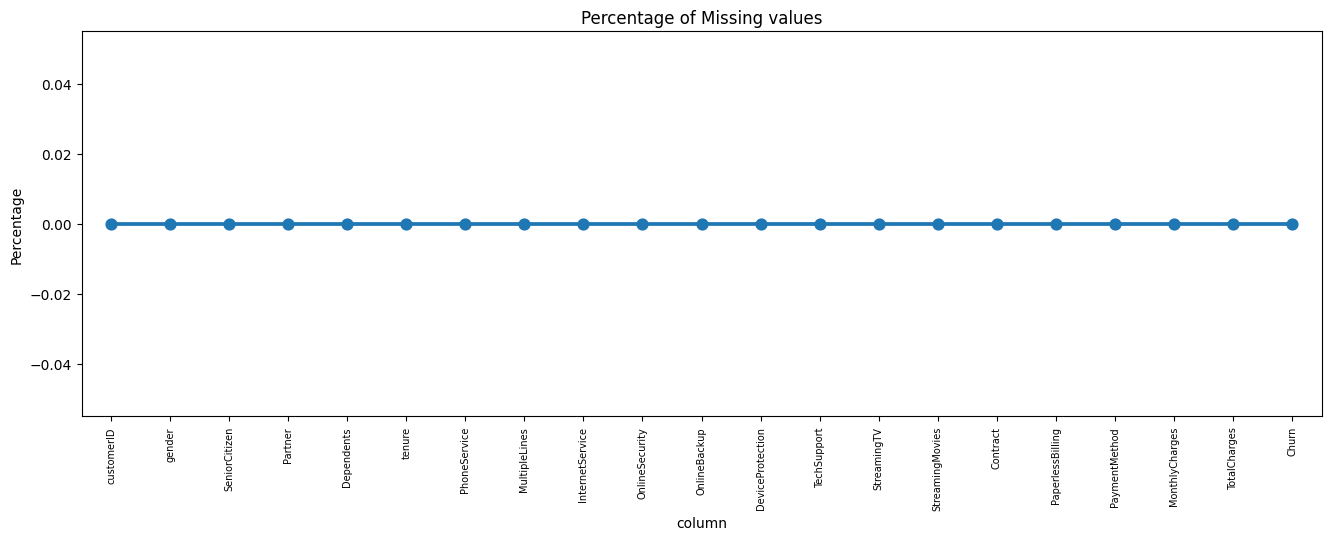

In [10]:
 # Checking if there are any missing values in the dataset
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
missing.columns = ['column', 'percentage']

plt.figure(figsize=(16,5))
ax = sns.pointplot(x='column', y='percentage', data=missing)

plt.xticks(rotation = 90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("Percentage")
plt.show()

**Missing Data - initial Intution**

* We don't have any missing data

General Thumb Rules:

* For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
* For features with very high number of missing values: it is better to drop those columns as they give very less insight on analysis.
* As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. But again there's a catch here. for example, is_Car & Car_types, people have no cars, all obviously have Car_type as NaN (null), but that doesn't make this column useless, so decisions has to be taken wisely.

## Data Cleaning

1. Create a copy of base data for manipulation & processing

In [11]:
new_df = df.copy()

In [12]:
new_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Changing the data type of the total charge column to numeric

In [13]:
new_df.TotalCharges = pd.to_numeric(new_df.TotalCharges, errors='coerce')
new_df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
x = new_df.TotalCharges.mean()
new_df.TotalCharges = new_df.TotalCharges.fillna(x)

In [15]:
new_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
new_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
df.tenure.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [18]:
new_df['tenureBin'] = pd.cut(new_df.tenure, bins=6, labels=['0-12','13-24','25-36','37-48','49-60','61-72'])

In [19]:
new_df.drop(columns = ['tenure'], axis=1, inplace=True)

In [20]:
# dropping the unnecessary columns
new_df.drop(columns= ['customerID'], axis=1, inplace=True)

## Data exploration

In [21]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenureBin
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12


### Univariate Analysis

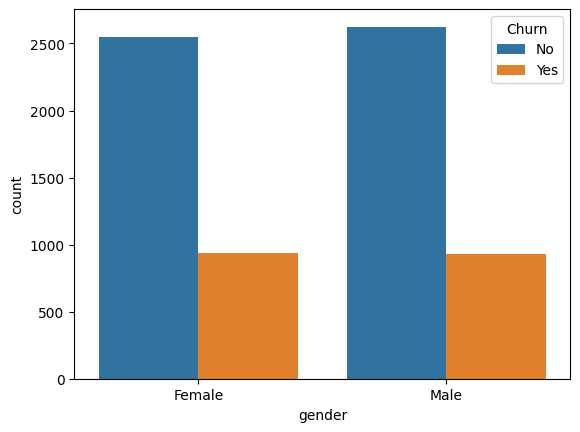

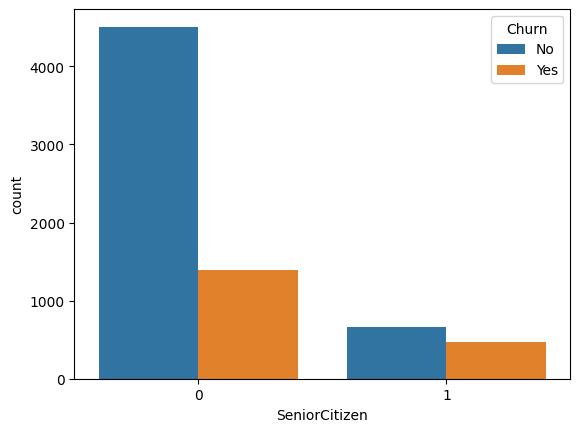

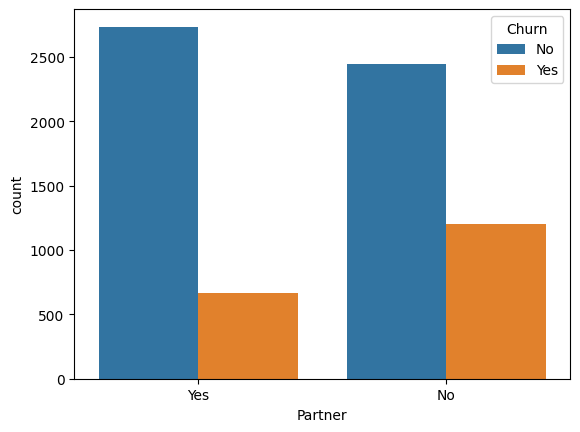

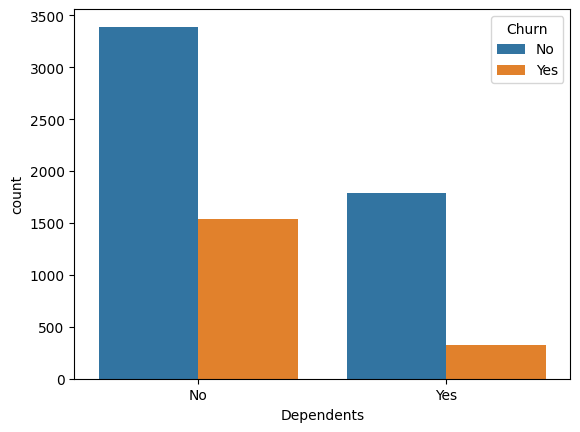

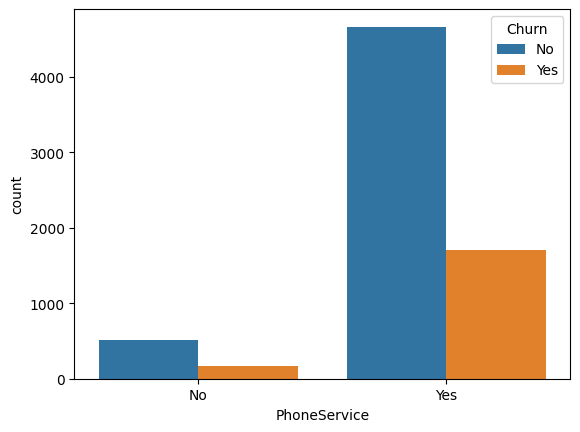

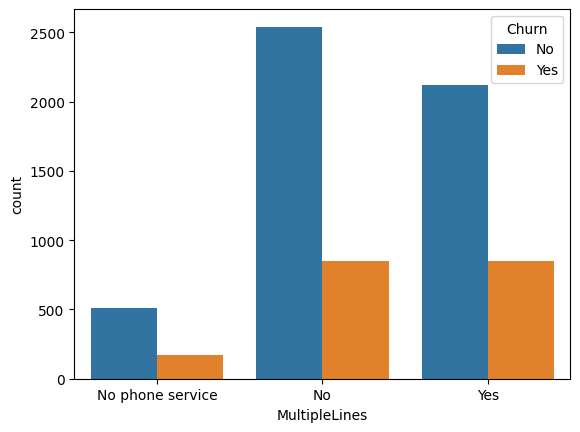

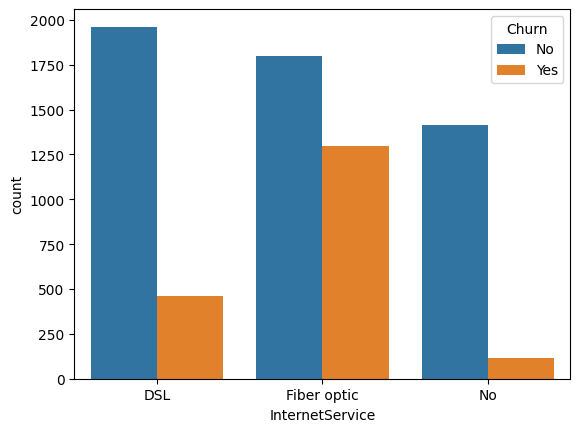

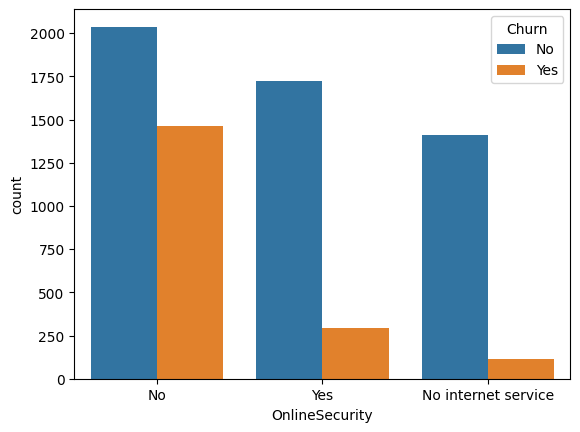

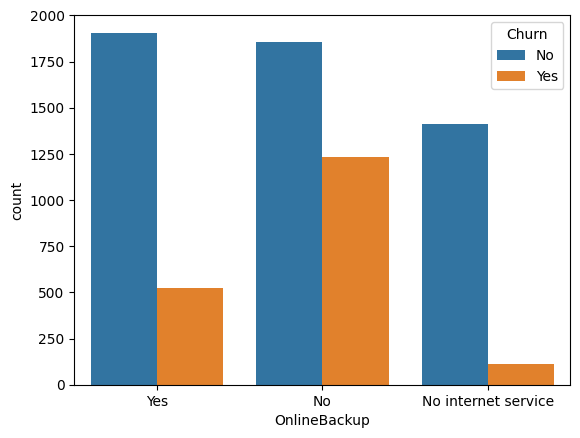

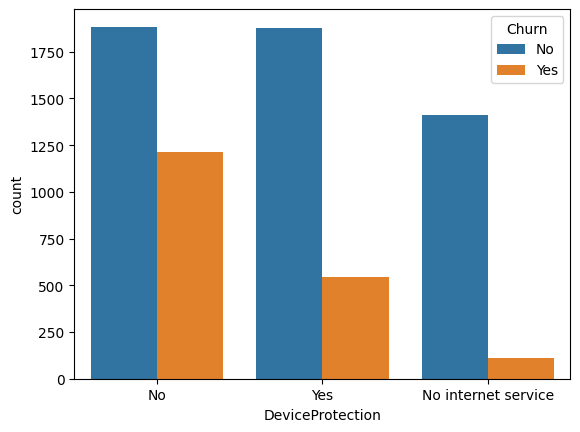

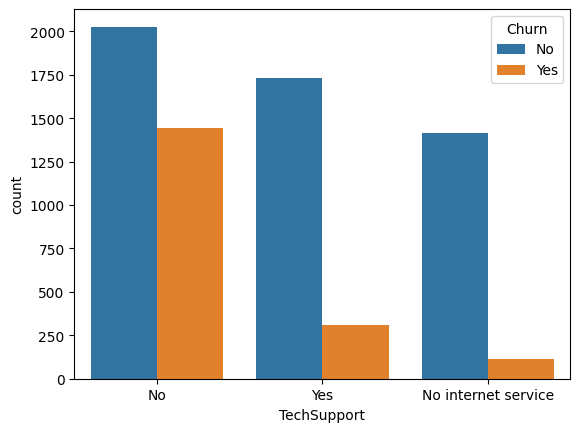

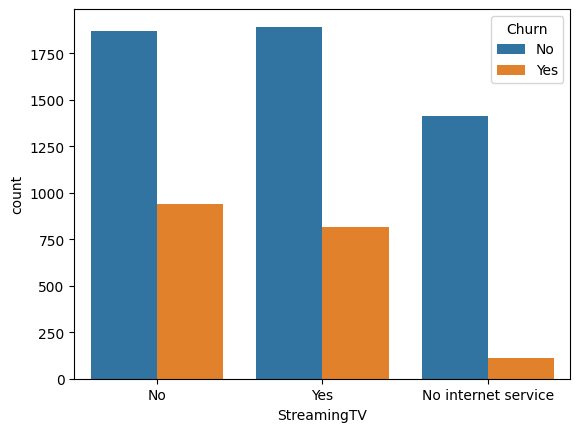

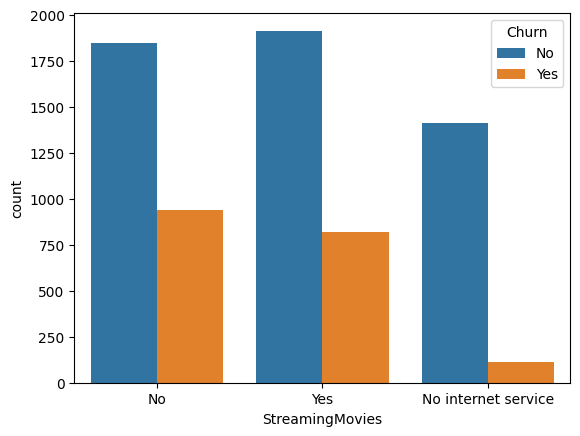

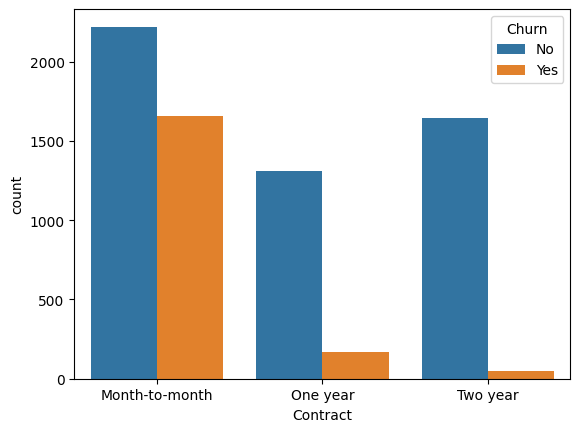

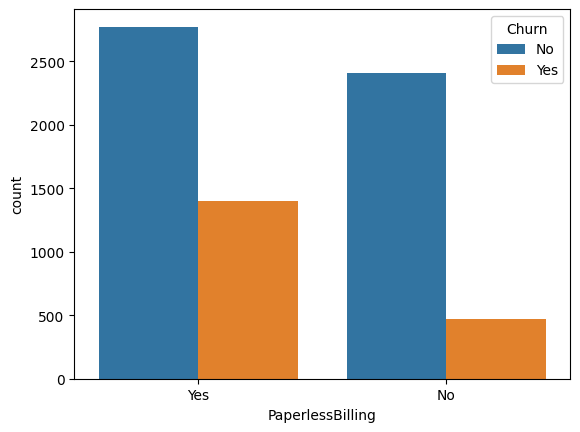

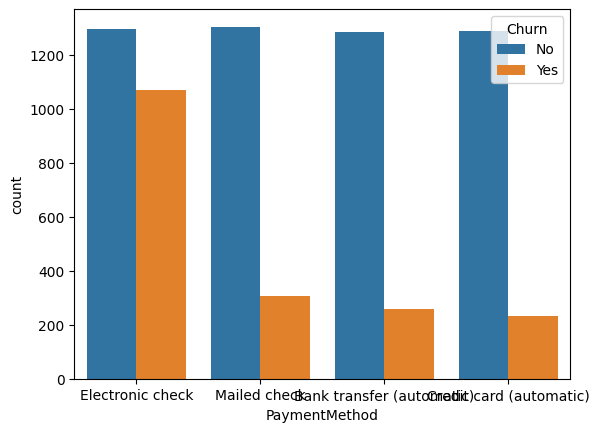

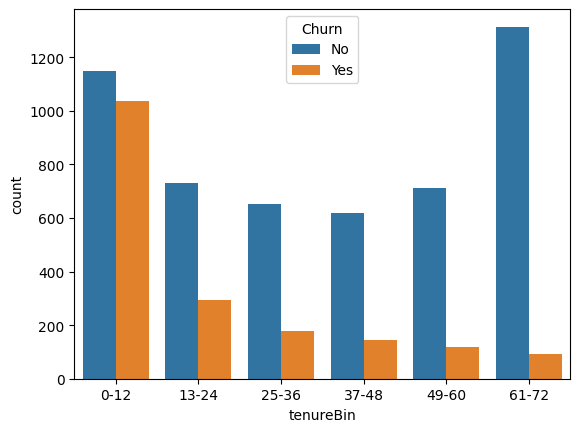

In [22]:
for i, predictor in enumerate(new_df.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data = new_df, x = predictor, hue='Churn')

**Observations**

* Gender column alone doesn't have impact on the churn rate
* Senior Citizen customers are more likely to churn as compared to others
* Customers with no partner are more likely to churn
* Monthly customers are most likely to churn almost 66% of monthly customers.
* Custoomer using Electronic Check payment method have high churn rate(around 80%)
* Customers with tenure period between 0 to 12 months have high churn rate
* Around 75% of the customers having no onlinesecurity are more likely to churn
* Around 65% of customers using fiberoptics internet services are possible to churn
* Customers with no techsupport and online backup are more likely to churn

### Numerical Analysis

In [23]:
# for Payment method
pd.crosstab(new_df.PaymentMethod, new_df.Churn)

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


In [24]:
# for internet services
pd.crosstab(new_df.InternetService, new_df.Churn)

Churn,No,Yes
InternetService,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


In [25]:
# converting Churn column to numerical column
new_df['Churn'] = np.where(new_df.Churn == 'Yes', 1, 0)

In [26]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenureBin
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0-12


#### Quick Preprocessing

In [27]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   object  
 1   SeniorCitizen     7043 non-null   int64   
 2   Partner           7043 non-null   object  
 3   Dependents        7043 non-null   object  
 4   PhoneService      7043 non-null   object  
 5   MultipleLines     7043 non-null   object  
 6   InternetService   7043 non-null   object  
 7   OnlineSecurity    7043 non-null   object  
 8   OnlineBackup      7043 non-null   object  
 9   DeviceProtection  7043 non-null   object  
 10  TechSupport       7043 non-null   object  
 11  StreamingTV       7043 non-null   object  
 12  StreamingMovies   7043 non-null   object  
 13  Contract          7043 non-null   object  
 14  PaperlessBilling  7043 non-null   object  
 15  PaymentMethod     7043 non-null   object  
 16  MonthlyCharges    7043 n

In [28]:
new_df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
tenureBin              6
dtype: int64

In [29]:
# Converting the Categorical columns to numerical
# First we will start with binary categorical data
new_df['gender'] = new_df['gender'].map({'Female':1, 'Male':0})
new_df['Partner'] = new_df['Partner'].map({'Yes':1, 'No':0})
new_df['Dependents'] = new_df['Dependents'].map({'Yes':1, 'No':0})
new_df['PhoneService'] = new_df['PhoneService'].map({'Yes':1, 'No':0})
new_df['PaperlessBilling'] = new_df['PaperlessBilling'].map({'Yes':1, 'No':0})

In [30]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   int64   
 1   SeniorCitizen     7043 non-null   int64   
 2   Partner           7043 non-null   int64   
 3   Dependents        7043 non-null   int64   
 4   PhoneService      7043 non-null   int64   
 5   MultipleLines     7043 non-null   object  
 6   InternetService   7043 non-null   object  
 7   OnlineSecurity    7043 non-null   object  
 8   OnlineBackup      7043 non-null   object  
 9   DeviceProtection  7043 non-null   object  
 10  TechSupport       7043 non-null   object  
 11  StreamingTV       7043 non-null   object  
 12  StreamingMovies   7043 non-null   object  
 13  Contract          7043 non-null   object  
 14  PaperlessBilling  7043 non-null   int64   
 15  PaymentMethod     7043 non-null   object  
 16  MonthlyCharges    7043 n

In [31]:
# Now let's convert other categorical values to numeric too
new_df = pd.get_dummies(new_df, drop_first=True, dtype= 'int')

In [32]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,...,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenureBin_13-24,tenureBin_25-36,tenureBin_37-48,tenureBin_49-60,tenureBin_61-72
0,1,0,1,0,0,1,29.85,29.85,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,56.95,1889.50,0,0,...,1,0,0,0,1,0,1,0,0,0
2,0,0,0,0,1,1,53.85,108.15,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,42.30,1840.75,0,1,...,1,0,0,0,0,0,0,1,0,0
4,1,0,0,0,1,1,70.70,151.65,1,0,...,0,0,0,1,0,0,0,0,0,0


**Relationship b/w Monthly Charges and Total Charges**

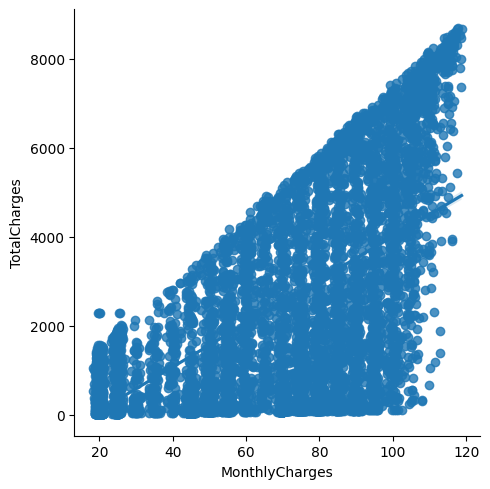

In [33]:
sns.lmplot(data = new_df, x='MonthlyCharges', y='TotalCharges')

There is a positive correlation between monthly charges and total charges

In [34]:
new_df['MonthlyCharges'].corr(new_df['TotalCharges'])

0.6504680404415565

Churn by monthly charges and total charges plot

Text(0.5, 1.0, 'Monthly Charges by Churn')

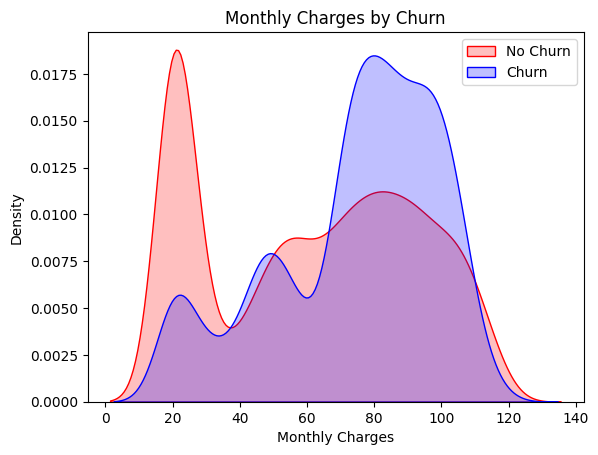

In [35]:
plot = sns.kdeplot(new_df.MonthlyCharges[new_df.Churn == 0], color = 'Red', fill=True)
plot = sns.kdeplot(new_df.MonthlyCharges[new_df.Churn == 1], color = 'Blue', fill = True)
plot.legend(['No Churn', 'Churn'])
plot.set_ylabel('Density')
plot.set_xlabel('Monthly Charges')
plot.set_title('Monthly Charges by Churn')

**Insight**: Churn is high when Monthly Charges are high

Text(0.5, 1.0, 'Total Charges by Churn')

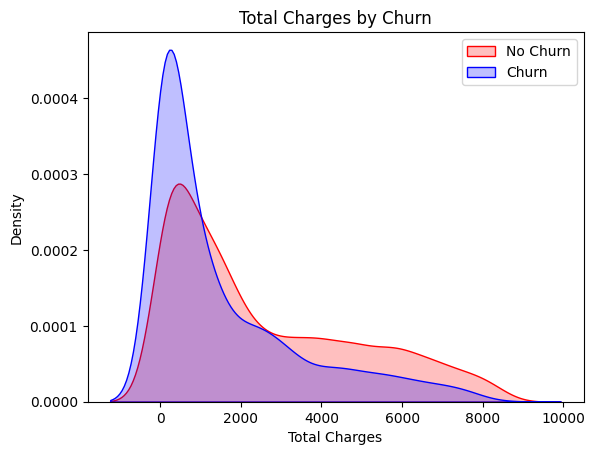

In [36]:
plot = sns.kdeplot(new_df.TotalCharges[new_df.Churn == 0], color="Red", fill = True)
plot = sns.kdeplot(new_df.TotalCharges[new_df.Churn == 1], color="Blue", fill = True)
plot.legend(['No Churn', 'Churn'])
plot.set_ylabel('Density')
plot.set_xlabel('Total Charges')
plot.set_title('Total Charges by Churn')

**Insight**: Churn is high when Total Charges are low

However if we combine the insights of 3 parameters i.e., Tenure, MonthlyCharges & Total Charges then the picture is bit clear. Higher Monthly Charges at lower tenure results into lower Total Charges. Hence, all these 3 factors: **Higher Monthly Charge, Lower tenure and Lower Total Charges** are linked to **High Churn**.

**Build a correlation of all predictors with churn**

<Axes: >

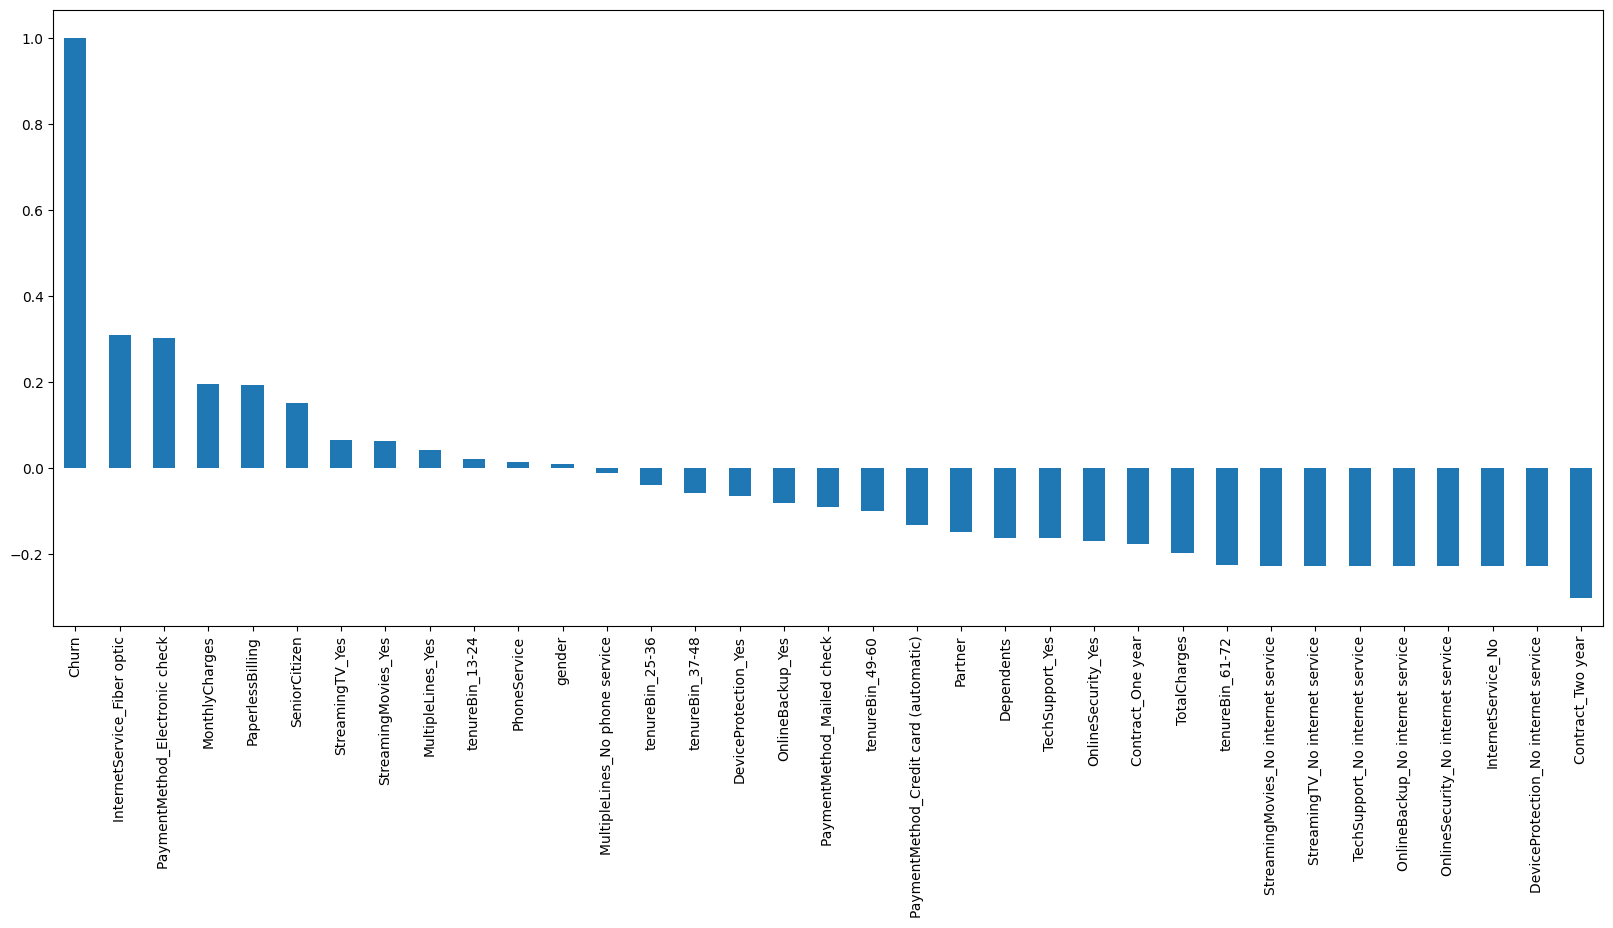

In [37]:
plt.figure(figsize=(20,8))
new_df.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

<Axes: >

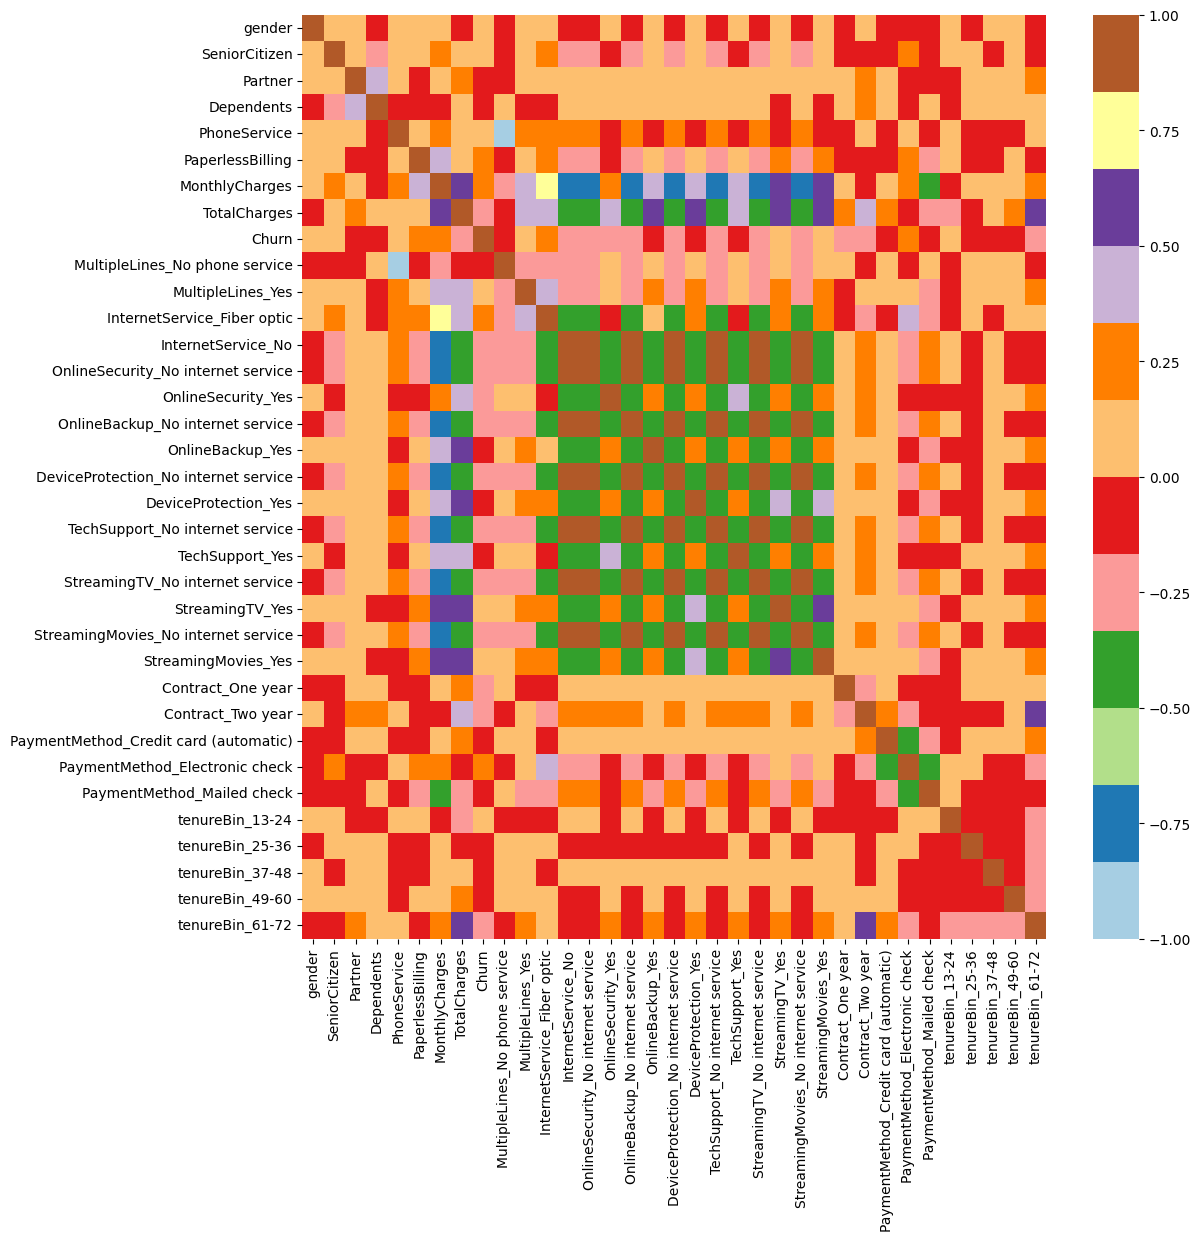

In [38]:
plt.figure(figsize=(12, 12))
sns.heatmap(new_df.corr(), cmap='Paired')

## Model Training

In [39]:
# Splitting the dataset
X = new_df.drop(columns=['Churn'], axis=1)
y = new_df['Churn']

In [40]:
print('X.shape: ', X.shape)
print('y.shape: ', y.shape)

X.shape:  (7043, 34)
y.shape:  (7043,)


### Splitting the dataset into training set and testing set

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2, random_state=42)

In [42]:
print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_train.shape: ", y_train.shape)
print("y_test.shape: ", y_test.shape)

X_train.shape:  (5634, 34)
X_test.shape:  (1409, 34)
y_train.shape:  (5634,)
y_test.shape:  (1409,)


In [43]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression()

In [45]:
params = {
    'penalty': ('l2', 'l1', None),
    'C':(1.0, 0.01, 0.1),
    'max_iter':(100, 1000, 1500)
}

grid_search = GridSearchCV(log_reg, params)
grid_search.fit(X_train, y_train)

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': (1.0, 0.01, 0.1), 'max_iter': (100, 1000, 1500),
                         'penalty': ('l2', 'l1', None)})

In [46]:
print("Best Parameter: ", grid_search.best_params_)

Best Parameter:  {'C': 1.0, 'max_iter': 100, 'penalty': 'l2'}


In [47]:
y_predict = grid_search.predict(X_test)

In [48]:
# accuracy on test set 
print("Accuracy: ", grid_search.score(X_test, y_test))

Accuracy:  0.7955997161107168


In [49]:
# Let's check on the scaled dataset
log_reg = LogisticRegression()
grid_search = GridSearchCV(log_reg, params)
grid_search.fit(X_train_scaled, y_train)

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': (1.0, 0.01, 0.1), 'max_iter': (100, 1000, 1500),
                         'penalty': ('l2', 'l1', None)})

In [50]:
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'C': 1.0, 'max_iter': 100, 'penalty': None}


In [51]:
print("Accuracy: ", grid_search.score(X_test_scaled, y_test))

Accuracy:  0.7955997161107168


### Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier()

rf_param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_grid = GridSearchCV(rnd_clf, rf_param_grid, cv=3, verbose=2)

In [53]:
rf_grid.fit(X_train, y_train) # Since Scaling doesn't have any affect on the output in random forest algorithm

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=5

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
243 fits failed out of a total of 729.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
243 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 6

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 300, 500]},
             verbose=2)

In [54]:
print("Best Parameters: ", rf_grid.best_params_)

Best Parameters:  {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


#### Plotting feature importances acc. to random forest 

In [63]:
importance = rf_grid.best_estimator_.feature_importances_
indices = np.argsort(importance)[::-1] 

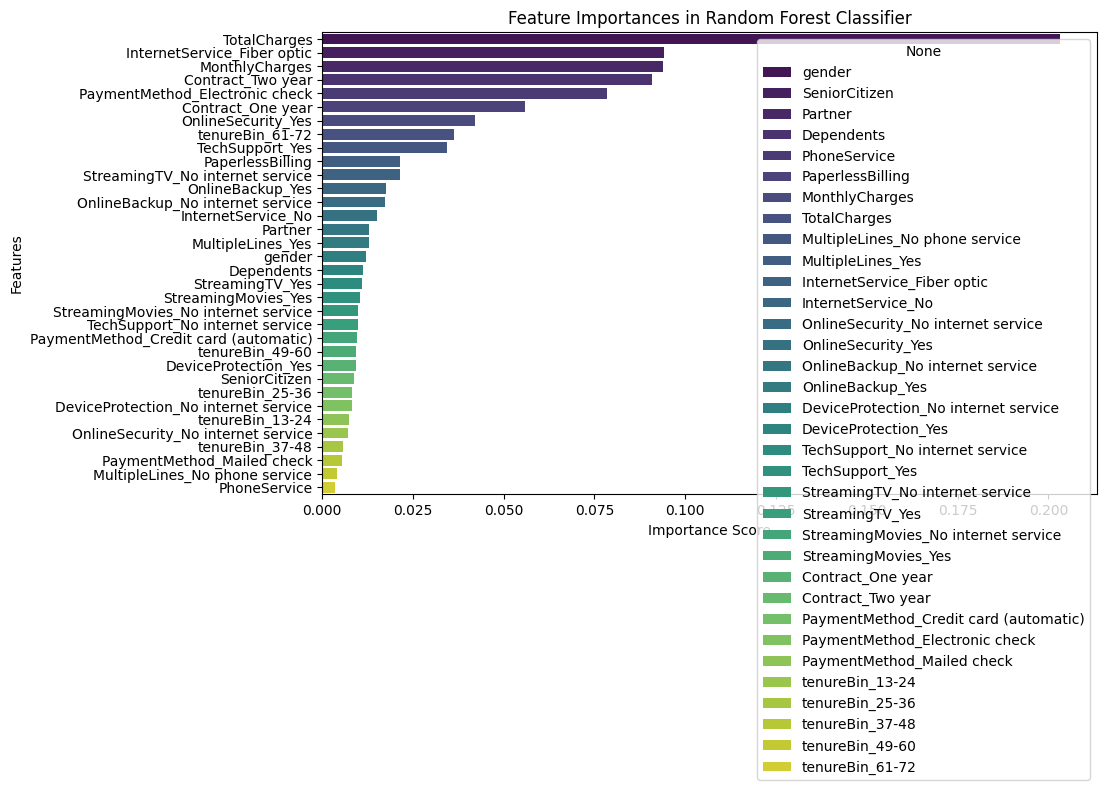

In [68]:
col = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importance[indices], y=col[indices], hue=col, palette='viridis')
plt.title('Feature Importances in Random Forest Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [ ]:
# accuracy of random forest
y_predict = rf_gr